In [43]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import math
from numpy.linalg import multi_dot
# initial guess is x=0, y=0
x = 0
y = 0

def f(x,y) :
    return (2 - 2*x - 3*y)**2 + x**2 + (y-1)**2

def fp(x,y) :
    return np.array([(10*x + 12*y - 8), (12*x + 20*y - 14)])

def fpp(x,y) :
    return  inv(np.array([[10,12],[12,20]]))

convergence = []
value = fp(x,y)
i = 0
xn = x
yn = y
i = 0
while 0.5*(np.dot(fp(xn,yn), np.dot(fpp(xn,yn), fp(xn,yn).transpose()))) > 0.001 :
  temp_mat = -np.dot(fpp(x,y), fp(x,y))
  temp_var0, temp_var1 = temp_mat[0], temp_mat[1]
  
  print("temp",temp_var0, temp_var1)
  print("variables",xn,yn)
  
  xn = xn + temp_var0
  yn = yn + temp_var1
  
  convergence.append(math.log(f(xn,yn)))
  i = i + 1
  if i == 100: break
print(f"No. of iterations {i}")

result = math.sqrt(f(xn,yn))

print(f"x1 = {1-2*xn-3*yn}")
print(f"x2 = {xn}")
print(f"x3 = {yn}")
print(f"Slopes at calculated x2 and x3 {fp(xn,yn)}")
print(f"Shortest distance from the given point is {result}")

temp -0.1428571428571428 0.7857142857142858
variables 0 0
No. of iterations 1
x1 = -1.071428571428572
x2 = -0.1428571428571428
x3 = 0.7857142857142858
Slopes at calculated x2 and x3 [3.55271368e-15 1.77635684e-15]
Shortest distance from the given point is 0.26726124191242445


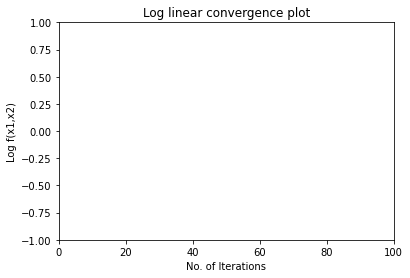

In [44]:
plt.title("Log linear convergence plot")
plt.xlabel("No. of Iterations")
# plt.xscale("linear")
plt.xlim(0,100)
plt.ylim(-1,1)
plt.ylabel("Log f(x1,x2)")
plt.plot(convergence)